In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Understanding and preperation

In [2]:
# reading the dataframe
appdata = pd.read_csv('application_data.csv')
prevdata=pd.read_csv('previous_application.csv')

In [3]:
# Data inspections
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
pd.set_option('display.max_columns',500)

In [5]:
appdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
appdata.shape

(307511, 122)

In [8]:
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
# inspecting the null values for all columns with their percentages
appdata.isnull().mean()*100


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [10]:
#dropping coloumnshaving missing values more than 40%
appdata.dropna(thresh=appdata.shape[0]*0.6,how='all',axis=1,inplace=True)

In [11]:
appdata.shape

(307511, 73)

In [12]:
# dropping the all irrelevant columns regarding with problem statement
appdata.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_PHONE','FLAG_EMAIL', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE' ,'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY'],axis=1,inplace=True)

In [13]:
appdata.shape

(307511, 26)

In [14]:
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,2.152665
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.910682
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [15]:
appdata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE'],
      dtype='object')

In [16]:
# dropping the duplicates
appdata.drop_duplicates(keep='first')
appdata

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,-9461,-637,-3648.0,-2120,1,1,0,1,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,-16765,-1188,-1186.0,-291,1,1,0,1,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,-19046,-225,-4260.0,-2531,1,1,1,1,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,-19005,-3039,-9833.0,-2437,1,1,0,1,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,-19932,-3038,-4311.0,-3458,1,1,0,1,Core staff,1.0,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,-9327,-236,-8456.0,-1982,1,1,0,1,Sales staff,1.0,Services
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,-20775,365243,-4388.0,-4090,1,0,0,1,NaN,1.0,XNA
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,-14966,-7921,-6737.0,-5150,1,1,0,1,Managers,1.0,School
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,-11961,-4786,-2562.0,-931,1,1,0,1,Laborers,2.0,Business Entity Type 1


In [17]:
appdata.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_ANNUITY               12
AMT_GOODS_PRICE          278
NAME_TYPE_SUITE         1292
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
DAYS_REGISTRATION          0
DAYS_ID_PUBLISH            0
FLAG_MOBIL                 0
FLAG_EMP_PHONE             0
FLAG_WORK_PHONE            0
FLAG_CONT_MOBILE           0
OCCUPATION_TYPE        96391
CNT_FAM_MEMBERS            2
ORGANIZATION_TYPE          0
dtype: int64

In [18]:
# dropping the records with AMT_ANNUITY missing
appdata=appdata[~appdata.AMT_ANNUITY.isnull()].copy()
appdata.shape

(307499, 26)

In [19]:
# dropping the records with AMT_GOODS_PRICE missing
appdata=appdata[~appdata.AMT_GOODS_PRICE.isnull()].copy()
appdata.shape

(307221, 26)

In [20]:
# replacing the NAME_TYPE_SUITE column missing value with mode of the column
appdata.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811592
Family             0.131114
Spouse, partner    0.037132
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [21]:
# Unaccompanied has 81% therefore it is mode of the  NAME_TYPE_SUITE column
NAME_TYPE_SUITE_mode='Unaccompanied'
appdata.NAME_TYPE_SUITE.fillna( NAME_TYPE_SUITE_mode,inplace=True)

In [22]:
# LASTLY we have to deal with null values of the OCCUPATION_TYPE column
OCCUPATION_TYPE_null = 'Laborers'
appdata.OCCUPATION_TYPE.fillna(OCCUPATION_TYPE_null ,inplace=True)

In [23]:
appdata.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
DAYS_REGISTRATION      0
DAYS_ID_PUBLISH        0
FLAG_MOBIL             0
FLAG_EMP_PHONE         0
FLAG_WORK_PHONE        0
FLAG_CONT_MOBILE       0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

after removing the all null values we have to deal with the datatype of the columns

### Data cleaning and manipulation

In [24]:
#Checking the data types for all columns
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307221 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307221 non-null  int64  
 1   TARGET               307221 non-null  int64  
 2   NAME_CONTRACT_TYPE   307221 non-null  object 
 3   CODE_GENDER          307221 non-null  object 
 4   FLAG_OWN_CAR         307221 non-null  object 
 5   FLAG_OWN_REALTY      307221 non-null  object 
 6   CNT_CHILDREN         307221 non-null  int64  
 7   AMT_INCOME_TOTAL     307221 non-null  float64
 8   AMT_CREDIT           307221 non-null  float64
 9   AMT_ANNUITY          307221 non-null  float64
 10  AMT_GOODS_PRICE      307221 non-null  float64
 11  NAME_TYPE_SUITE      307221 non-null  object 
 12  NAME_INCOME_TYPE     307221 non-null  object 
 13  NAME_EDUCATION_TYPE  307221 non-null  object 
 14  NAME_FAMILY_STATUS   307221 non-null  object 
 15  DAYS_BIRTH       

In [25]:
# we have to standardise the all the AMOUNT columns
# converting the datatype to int and round off all amount,DAYS_REGISTRATION and CNT_FAM_MEMBERS values
appdata = appdata.astype({'AMT_INCOME_TOTAL':'int','AMT_CREDIT':'int','AMT_ANNUITY':'int',
                          'AMT_GOODS_PRICE':'int','DAYS_REGISTRATION':'int','CNT_FAM_MEMBERS':'int'})

appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary / secondary special,Single / not married,-9461,-637,-3648,-2120,1,1,0,1,Laborers,1,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher education,Married,-16765,-1188,-1186,-291,1,1,0,1,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary / secondary special,Single / not married,-19046,-225,-4260,-2531,1,1,1,1,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,-19005,-3039,-9833,-2437,1,1,0,1,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary / secondary special,Single / not married,-19932,-3038,-4311,-3458,1,1,0,1,Core staff,1,Religion


In [26]:
# columns having two values need to get spilt 
appdata['NAME_EDUCATION_TYPE']=appdata.NAME_EDUCATION_TYPE.apply(lambda x:x.split()[0])
appdata['NAME_FAMILY_STATUS']=appdata.NAME_FAMILY_STATUS.apply(lambda x:x.split()[0])
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary,Single,-9461,-637,-3648,-2120,1,1,0,1,Laborers,1,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher,Married,-16765,-1188,-1186,-291,1,1,0,1,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary,Single,-19046,-225,-4260,-2531,1,1,1,1,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary,Civil,-19005,-3039,-9833,-2437,1,1,0,1,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary,Single,-19932,-3038,-4311,-3458,1,1,0,1,Core staff,1,Religion


In [27]:
#coverting all negative values colum to positive value for correct data inferences
appdata['DAYS_EMPLOYED']=appdata['DAYS_EMPLOYED'].abs()
appdata[ 'DAYS_BIRTH']=appdata[ 'DAYS_BIRTH'].abs()
appdata['DAYS_REGISTRATION']=appdata['DAYS_REGISTRATION'].abs()
appdata['DAYS_ID_PUBLISH']=appdata['DAYS_ID_PUBLISH'].abs()

## OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x202031702e0>,
 'caps': [<matplotlib.lines.Line2D at 0x202031709a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20203161f40>],
 'medians': [<matplotlib.lines.Line2D at 0x202031780a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20203178400>],
 'means': []}

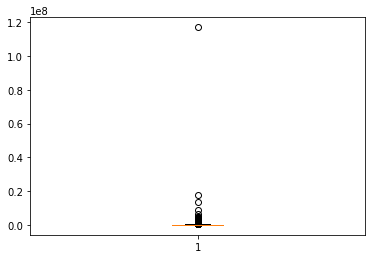

In [28]:
# checking outliers for all numerical columns
plt.boxplot(appdata.AMT_INCOME_TOTAL)

#### INFERENCES-     from above Box plot
          As it is cleared from above boxplot there is an outlier who is having income total very high

{'whiskers': [<matplotlib.lines.Line2D at 0x2020325f5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2020325fc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2020325f250>],
 'medians': [<matplotlib.lines.Line2D at 0x20203269370>],
 'fliers': [<matplotlib.lines.Line2D at 0x202032696d0>],
 'means': []}

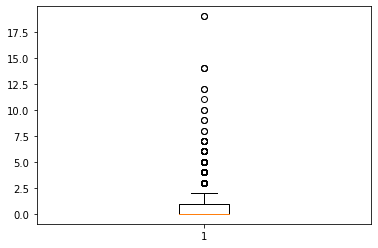

In [29]:
plt.boxplot(appdata.CNT_CHILDREN)

#### Inferences 
              in above boxplot although there is a rise but still there is an outlier

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

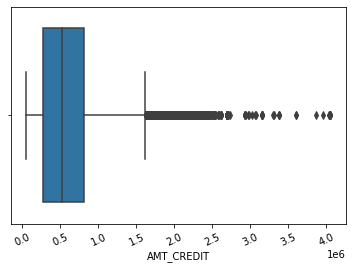

In [30]:
sns.boxplot(appdata.AMT_CREDIT )
plt.xticks(rotation=25)

#### Inferences 
              in above boxplot although there is a rise but still there are some outliers and some data lies out of IQR                   range.

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

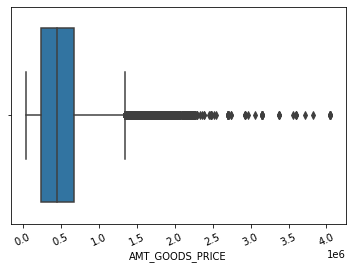

In [31]:
sns.boxplot(appdata.AMT_GOODS_PRICE)
plt.xticks(rotation=25)

#### Inferences 
              in above boxplot although there are many values outside IQR range

<AxesSubplot:xlabel='DAYS_BIRTH'>

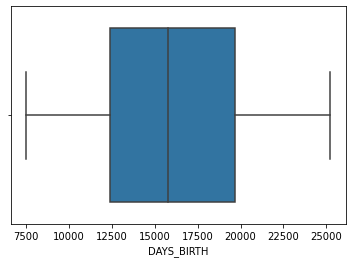

In [32]:
sns.boxplot(appdata.DAYS_BIRTH )

#### Infereces
           most of people are having days_birth almost same  

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

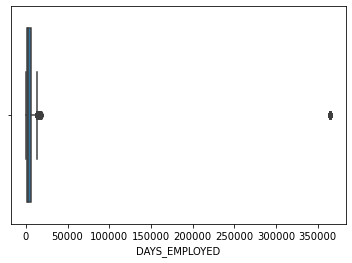

In [33]:
sns.boxplot(appdata.DAYS_EMPLOYED )

#### Inferences 
              1. there is an extreme outlier prsent in this boxplot
              2. this outlier clearly shows that it is the wrong data because noone can be employed for these many days


<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

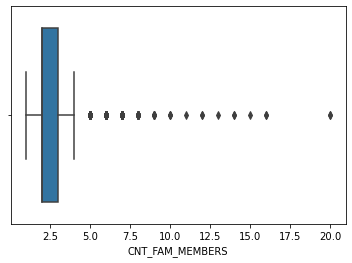

In [34]:
sns.boxplot(appdata.CNT_FAM_MEMBERS )

#### Inferences
         there is one extreme outlier in coumting family memebrs while some lies out of IQR range

### BINNING

Text(0.5, 1.0, 'AMT_INCOME_TOTAL')

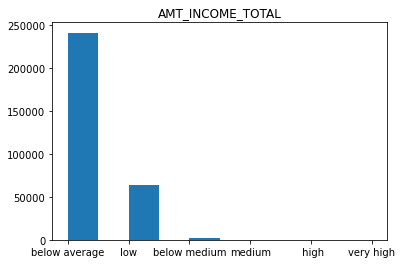

In [35]:
bins = [0,100000,500000,1000000,2000000,50000000,2000000000]
group_names=['low','below average','below medium','medium',' high','very high']
plt.hist(pd.cut(appdata['AMT_INCOME_TOTAL'],bins,labels=group_names))
plt.title('AMT_INCOME_TOTAL')

#### Inferences
            almost the income range of the people according to given data applying for loan 

Text(0.5, 1.0, 'AMT_CREDIT')

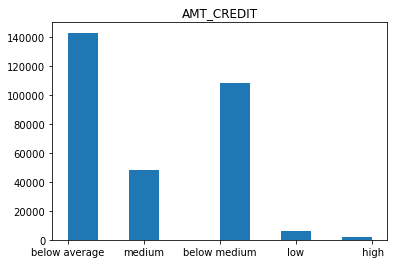

In [36]:

bins = [0,100000,500000,1000000,2000000,50000000,2000000000]
group_names=['low','below average','below medium','medium',' high','very high']
plt.hist(pd.cut(appdata['AMT_CREDIT'],bins,labels=group_names))
plt.title('AMT_CREDIT')

Text(0.5, 1.0, 'AMT_GOODS_PRICE')

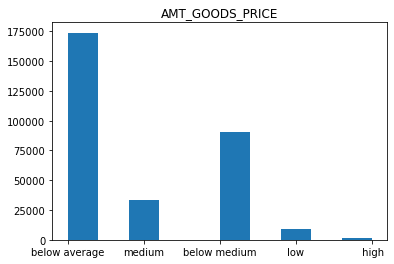

In [37]:
bins = [0,100000,500000,1000000,2000000,50000000,200000000]
group_names=['low','below average','below medium','medium',' high','very high']
plt.hist(pd.cut(appdata['AMT_GOODS_PRICE'],bins,labels=group_names))
plt.title('AMT_GOODS_PRICE')

## Imbalance Percetage

In [38]:
appdata['TARGET'].value_counts(normalize=True)*100

0    91.926333
1     8.073667
Name: TARGET, dtype: float64

In [39]:
appdata['CODE_GENDER'].value_counts(normalize=True)*100

F      65.832414
M      34.166284
XNA     0.001302
Name: CODE_GENDER, dtype: float64

In [40]:
appdata['FLAG_MOBIL'].value_counts(normalize=True)*100

1    99.999675
0     0.000325
Name: FLAG_MOBIL, dtype: float64

In [41]:
appdata['FLAG_CONT_MOBILE'].value_counts(normalize=True)*100

1    99.813164
0     0.186836
Name: FLAG_CONT_MOBILE, dtype: float64

In [43]:
appdata_1 = appdata[appdata['TARGET']==1]
appdata_0 = appdata[appdata['TARGET']==0]

### Various Analysis

### Correlation Matrix[Analysis]

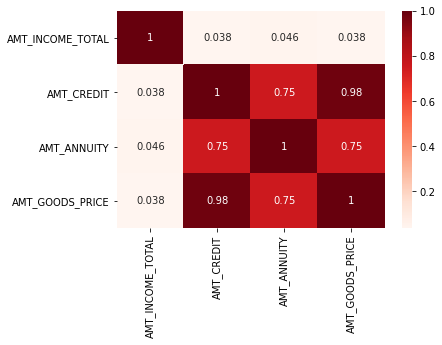

In [44]:
# comparing the all numerical values for the target 1(defaulters)
sns.heatmap(appdata_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot=True,cmap='Reds')
plt.show()

##### Inferences 
               the annuity and credit and  goods price and annuity are highly correlated

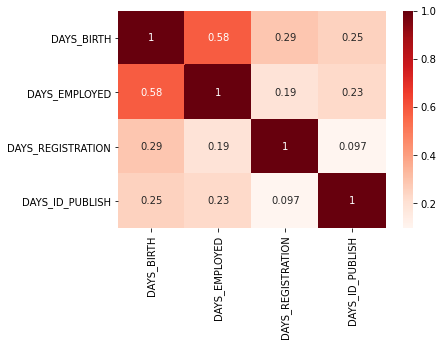

In [45]:
sns.heatmap(appdata_1[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(),annot=True,cmap='Reds')
plt.show()

##### Inferences 
              Days of birth and days employed are  coorelated with each other

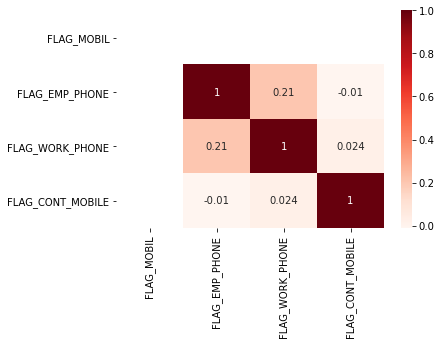

In [46]:
sns.heatmap(appdata_1[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE']].corr(),annot=True,cmap='Reds')
plt.show()

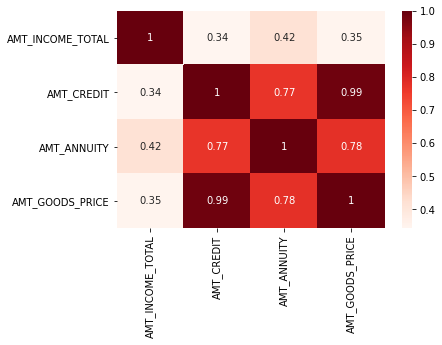

In [47]:
# comparing all the numerical values for target(0)
sns.heatmap(appdata_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot=True,cmap='Reds')
plt.show()

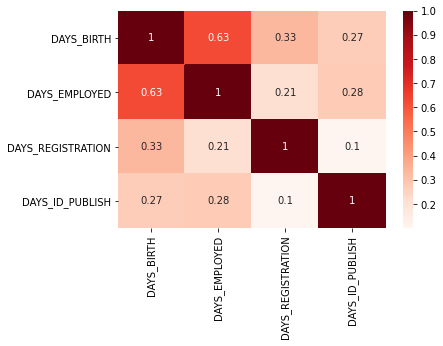

In [48]:
sns.heatmap(appdata_0[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].corr(),annot=True,cmap='Reds')
plt.show()

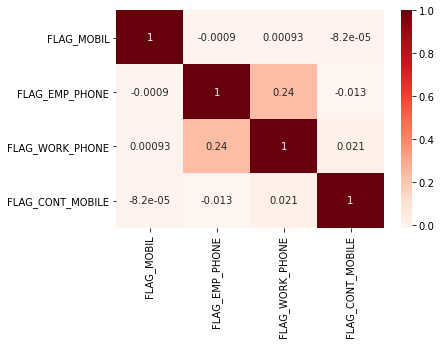

In [49]:
sns.heatmap(appdata_0[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE']].corr(),annot=True,cmap='Reds')
plt.show()

#### UNIVARIATE ANALYSIS

In [50]:
appdata_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher,Married,16765,1188,1186,291,1,1,0,1,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary,Single,19046,225,4260,2531,1,1,1,1,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary,Civil,19005,3039,9833,2437,1,1,0,1,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary,Single,19932,3038,4311,3458,1,1,0,1,Core staff,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000,490495,27517,454500,"Spouse, partner",State servant,Secondary,Married,16941,1588,4970,477,1,1,1,1,Laborers,2,Other


In [51]:
appdata_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary,Single,9461,637,3648,2120,1,1,0,1,Laborers,1,Business Entity Type 3
26,100031,1,Cash loans,F,N,Y,0,112500,979992,27076,702000,Unaccompanied,Working,Secondary,Widow,18724,2628,6573,1827,1,1,0,1,Cooking staff,1,Business Entity Type 3
40,100047,1,Cash loans,M,N,Y,0,202500,1193580,35028,855000,Unaccompanied,Commercial associate,Secondary,Married,17482,1262,1182,1029,1,1,0,1,Laborers,2,Business Entity Type 3
42,100049,1,Cash loans,F,N,N,0,135000,288873,16258,238500,Unaccompanied,Working,Secondary,Civil,13384,3597,45,4409,1,1,1,1,Sales staff,2,Self-employed
81,100096,1,Cash loans,F,N,Y,0,81000,252000,14593,252000,Unaccompanied,Pensioner,Secondary,Married,24794,365243,5391,4199,1,0,0,1,Laborers,2,XNA


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

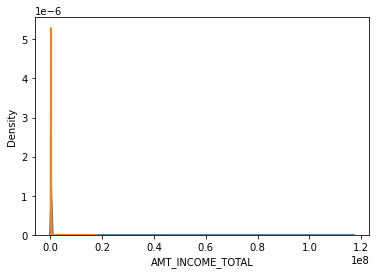

In [52]:
sns.distplot(appdata_1['AMT_INCOME_TOTAL'],hist=False,label='Defaulters')

sns.distplot(appdata_0['AMT_INCOME_TOTAL'],hist=False,label='Non Defaulters')

#### Inferences
           most defailters are having low income

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

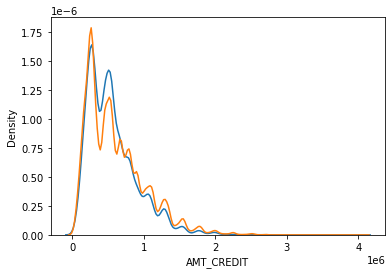

In [53]:
sns.distplot(appdata_1['AMT_CREDIT'],hist=False,label='Defaulters')
sns.distplot(appdata_0['AMT_CREDIT'],hist=False,label='Non Defaulters')

#### Inferences 
           there are less inferences from the above graph

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='Density'>

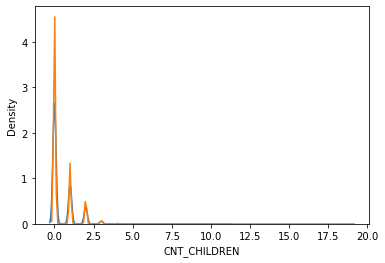

In [54]:
sns.distplot(appdata_1['CNT_CHILDREN'],hist=False,label='Defaulters')
sns.distplot(appdata_0['CNT_CHILDREN'],hist=False,label='Non Defaulters')

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

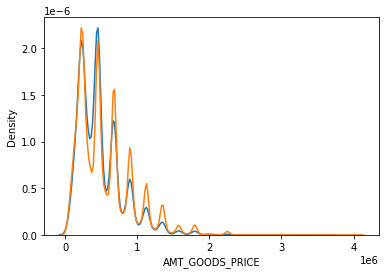

In [55]:
sns.distplot(appdata_1['AMT_GOODS_PRICE'],hist=False,label='Defaulters')
sns.distplot(appdata_0['AMT_GOODS_PRICE'],hist=False,label='Non Defaulters')

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

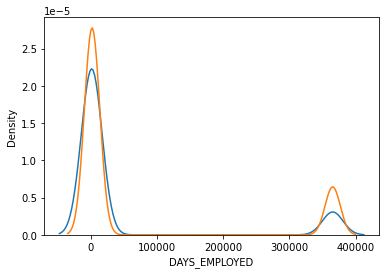

In [56]:
sns.distplot(appdata_1['DAYS_EMPLOYED'],hist=False,label='Defaulters')
sns.distplot(appdata_0['DAYS_EMPLOYED'],hist=False,label='Non Defaulters')

#### Inferences 
             the defaulters are having less employed days as there is a large population that lies in the less employed days range

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

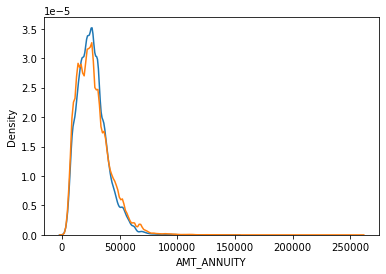

In [57]:
sns.distplot(appdata_1['AMT_ANNUITY'],hist=False,label='Defaulters')
sns.distplot(appdata_0['AMT_ANNUITY'],hist=False,label='Non Defaulters')

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Density'>

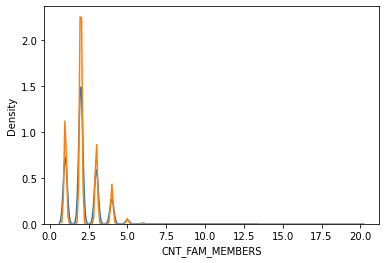

In [58]:
sns.distplot(appdata_1['CNT_FAM_MEMBERS'],hist=False,label='Defaulters')
sns.distplot(appdata_0['CNT_FAM_MEMBERS'],hist=False,label='Non Defaulters')

#### UNIVARIATE 
     > CATEGORICAL ANALYSIS

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

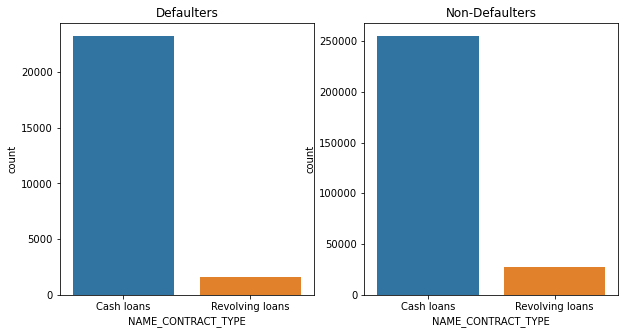

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',data=appdata_1)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',data=appdata_0)

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='CODE_GENDER', ylabel='count'>

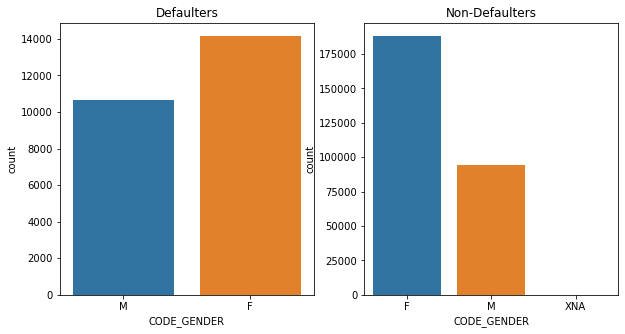

In [60]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='CODE_GENDER',data=appdata_1)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='CODE_GENDER',data=appdata_0)

##### Inferences
          The above plot clearly shows that females are more defaulters thant that of man

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='FLAG_OWN_CAR', ylabel='count'>

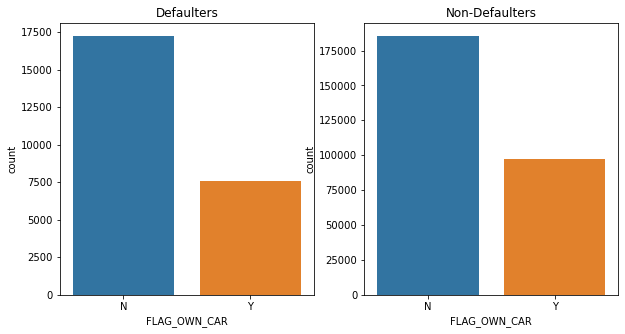

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='FLAG_OWN_CAR',data=appdata_1)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='FLAG_OWN_CAR',data=appdata_0)

####  Inferences 
               only small no of people own car irrespective of defaulter

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

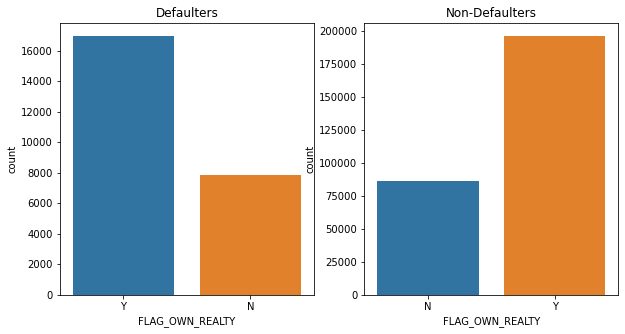

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='FLAG_OWN_REALTY',data=appdata_1)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='FLAG_OWN_REALTY',data=appdata_0)

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='NAME_TYPE_SUITE', ylabel='count'>

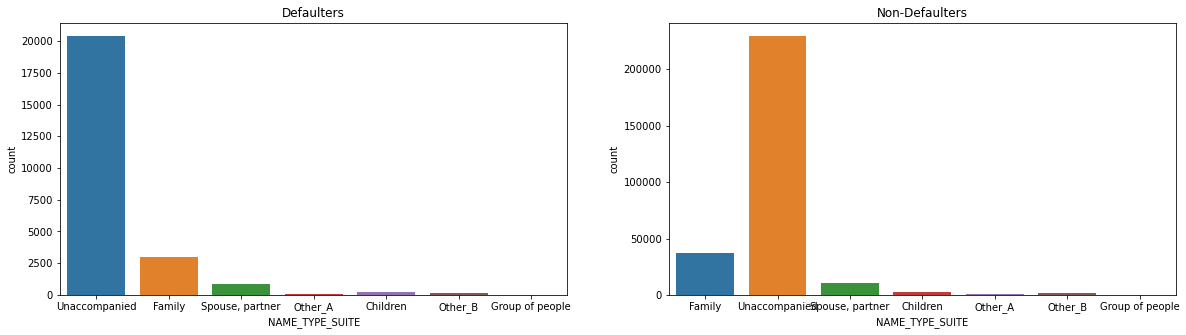

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_TYPE_SUITE',data=appdata_1)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_TYPE_SUITE',data=appdata_0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Higher'),
  Text(1, 0, 'Secondary'),
  Text(2, 0, 'Incomplete'),
  Text(3, 0, 'Lower'),
  Text(4, 0, 'Academic')])

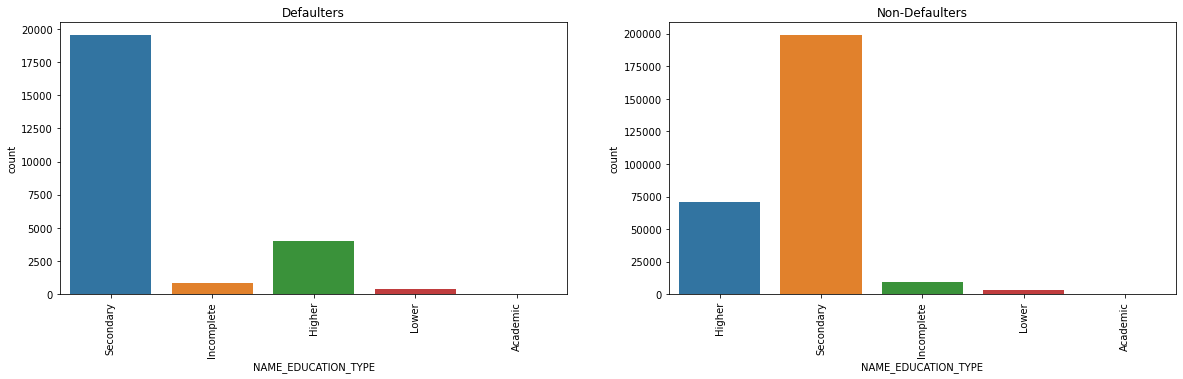

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',data=appdata_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',data=appdata_0)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Civil'),
  Text(3, 0, 'Widow'),
  Text(4, 0, 'Separated')])

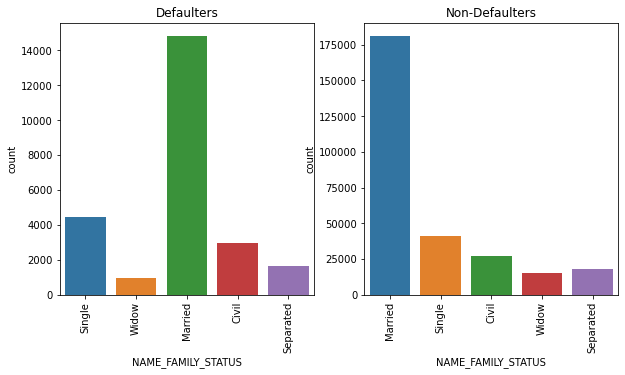

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_FAMILY_STATUS',data=appdata_1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_FAMILY_STATUS',data=appdata_0)
plt.xticks(rotation=90)

### Inferences
there is not much to take but we can say that married persons are more who apply for loan so as they are more deafulters and non defaulters both in this section

### Bivariate Analysis
        Continous- Continous

In [66]:
appdata_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher,Married,16765,1188,1186,291,1,1,0,1,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary,Single,19046,225,4260,2531,1,1,1,1,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary,Civil,19005,3039,9833,2437,1,1,0,1,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary,Single,19932,3038,4311,3458,1,1,0,1,Core staff,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000,490495,27517,454500,"Spouse, partner",State servant,Secondary,Married,16941,1588,4970,477,1,1,1,1,Laborers,2,Other


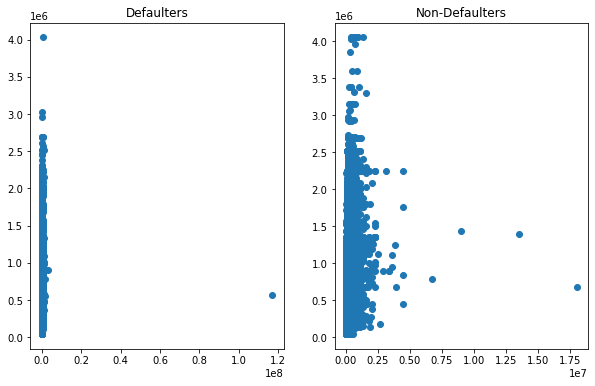

In [67]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.scatter(appdata_1['AMT_INCOME_TOTAL'],appdata_1['AMT_CREDIT'])
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
plt.scatter(appdata_0['AMT_INCOME_TOTAL'],appdata_0['AMT_CREDIT'])

#### Inferences 
         this scatter plot shows that defaulters are having a low income leaving some outliers

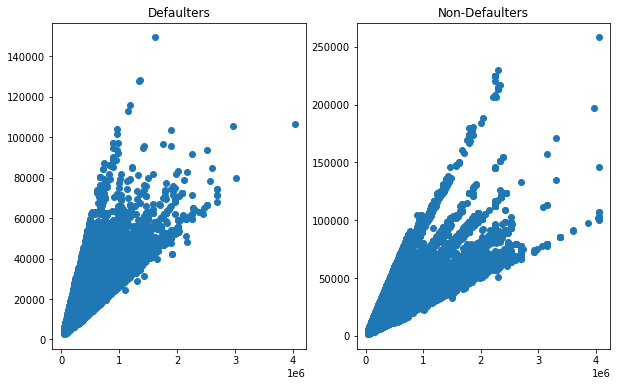

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.scatter(appdata_1['AMT_CREDIT'],appdata_1['AMT_ANNUITY'])
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
plt.scatter(appdata_0['AMT_CREDIT'],appdata_0['AMT_ANNUITY'])

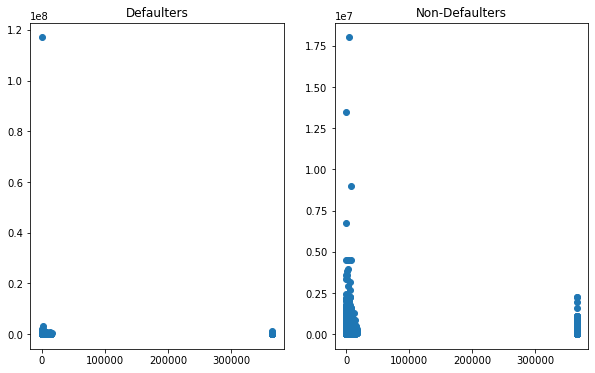

In [69]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.scatter(appdata_1['DAYS_EMPLOYED'],appdata_1['AMT_INCOME_TOTAL'])
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
plt.scatter(appdata_0['DAYS_EMPLOYED'],appdata_0['AMT_INCOME_TOTAL'])

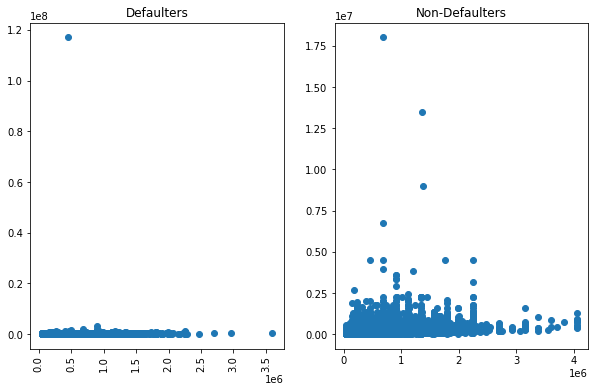

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.scatter(appdata_1['AMT_GOODS_PRICE'],appdata_1['AMT_INCOME_TOTAL'])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
plt.scatter(appdata_0['AMT_GOODS_PRICE'],appdata_0['AMT_INCOME_TOTAL'])

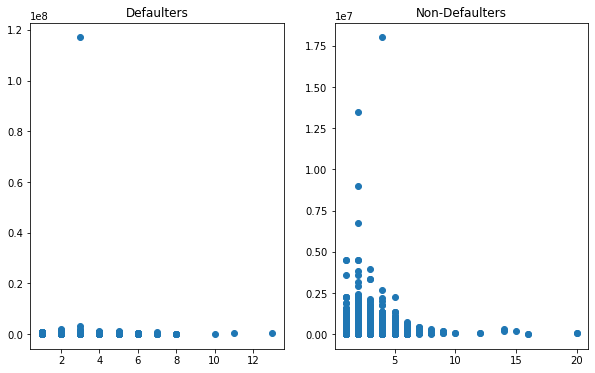

In [71]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
plt.scatter(appdata_1['CNT_FAM_MEMBERS'],appdata_1['AMT_INCOME_TOTAL'])
plt.subplot(1,2,2)
plt.title('Non-Defaulters')
plt.scatter(appdata_0['CNT_FAM_MEMBERS'],appdata_0['AMT_INCOME_TOTAL'])

### Bivariariate Analysis
 Categorical-Continous

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='FLAG_OWN_CAR', ylabel='AMT_INCOME_TOTAL'>

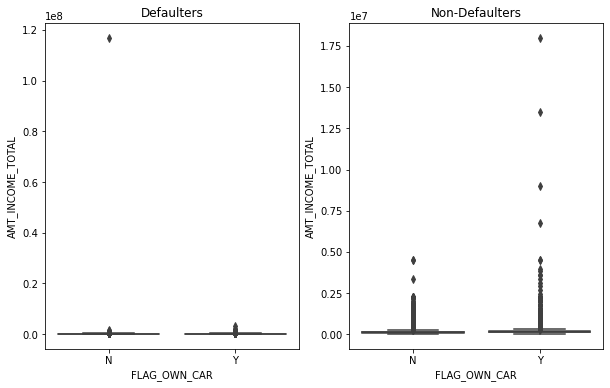

In [72]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')

sns.boxplot(x='FLAG_OWN_CAR',y='AMT_INCOME_TOTAL',data=appdata_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='FLAG_OWN_CAR',y='AMT_INCOME_TOTAL',data=appdata_0)

In [73]:
appdata_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher,Married,16765,1188,1186,291,1,1,0,1,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary,Single,19046,225,4260,2531,1,1,1,1,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary,Civil,19005,3039,9833,2437,1,1,0,1,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary,Single,19932,3038,4311,3458,1,1,0,1,Core staff,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000,490495,27517,454500,"Spouse, partner",State servant,Secondary,Married,16941,1588,4970,477,1,1,1,1,Laborers,2,Other


<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='CODE_GENDER', ylabel='AMT_INCOME_TOTAL'>

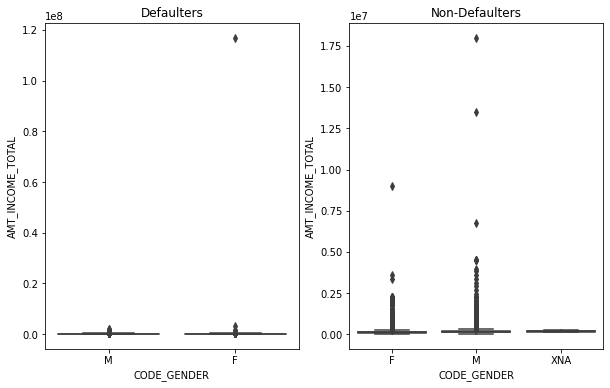

In [74]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')

sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=appdata_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='CODE_GENDER',y='AMT_INCOME_TOTAL',data=appdata_0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Family'),
  Text(1, 0, 'Unaccompanied'),
  Text(2, 0, 'Spouse, partner'),
  Text(3, 0, 'Children'),
  Text(4, 0, 'Other_A'),
  Text(5, 0, 'Other_B'),
  Text(6, 0, 'Group of people')])

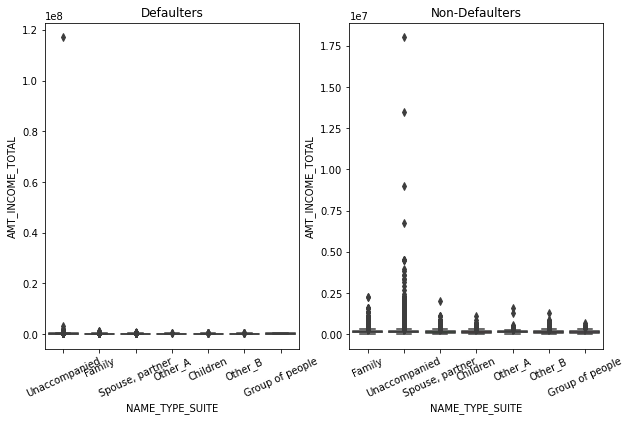

In [75]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')

sns.boxplot(x='NAME_TYPE_SUITE',y='AMT_INCOME_TOTAL',data=appdata_1)
plt.xticks(rotation=25)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='NAME_TYPE_SUITE',y='AMT_INCOME_TOTAL',data=appdata_0)
plt.xticks(rotation=25)

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_INCOME_TOTAL'>

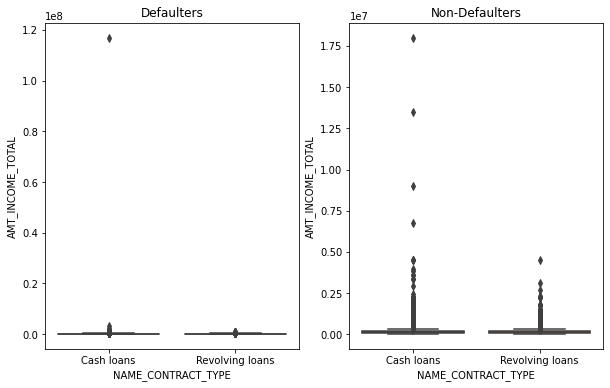

In [76]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')

sns.boxplot(y='AMT_INCOME_TOTAL',x='NAME_CONTRACT_TYPE',data=appdata_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(y='AMT_INCOME_TOTAL',x='NAME_CONTRACT_TYPE',data=appdata_0)

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='AMT_INCOME_TOTAL', ylabel='FLAG_OWN_CAR'>

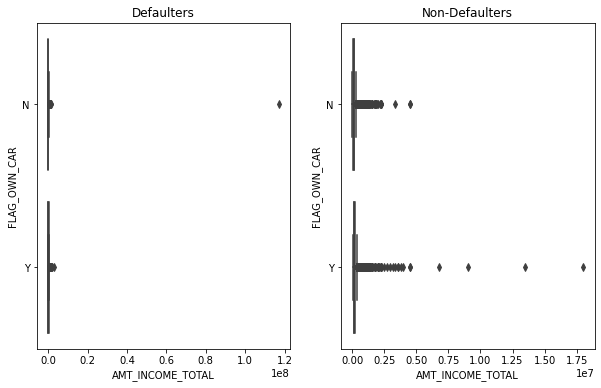

In [77]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')

sns.boxplot(x='AMT_INCOME_TOTAL',y='FLAG_OWN_CAR',data=appdata_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.boxplot(x='AMT_INCOME_TOTAL',y='FLAG_OWN_CAR',data=appdata_0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Higher'),
  Text(1, 0, 'Secondary'),
  Text(2, 0, 'Incomplete'),
  Text(3, 0, 'Lower'),
  Text(4, 0, 'Academic')])

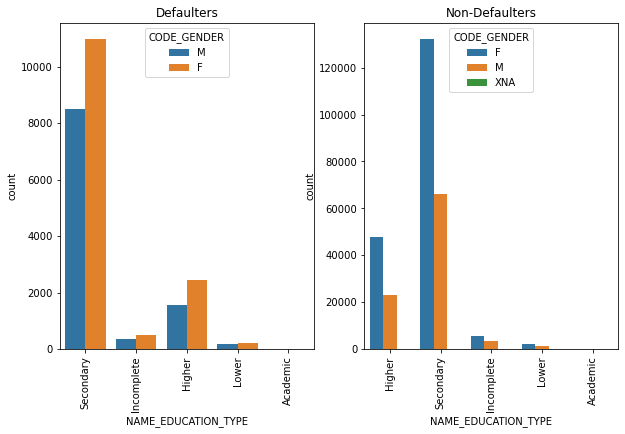

In [78]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=appdata_1)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=appdata_0)
plt.xticks(rotation=90)

<AxesSubplot:title={'center':'Non-Defaulters'}, xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

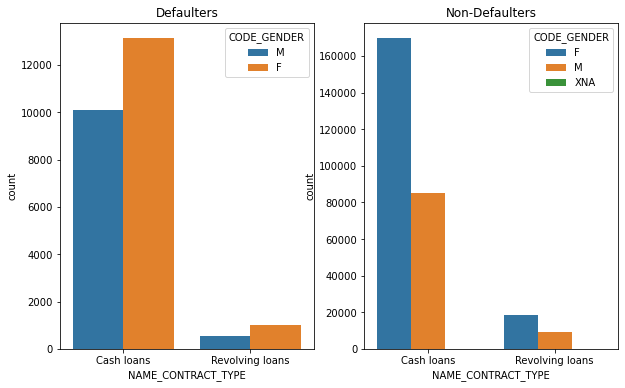

In [79]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',data=appdata_1)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',data=appdata_0)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'State servant'),
  Text(1, 0, 'Working'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

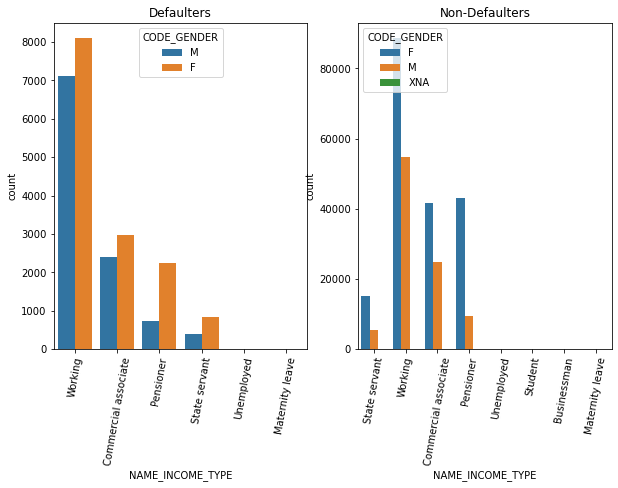

In [80]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=appdata_1)
plt.xticks(rotation=80)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=appdata_0)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Civil'),
  Text(3, 0, 'Widow'),
  Text(4, 0, 'Separated')])

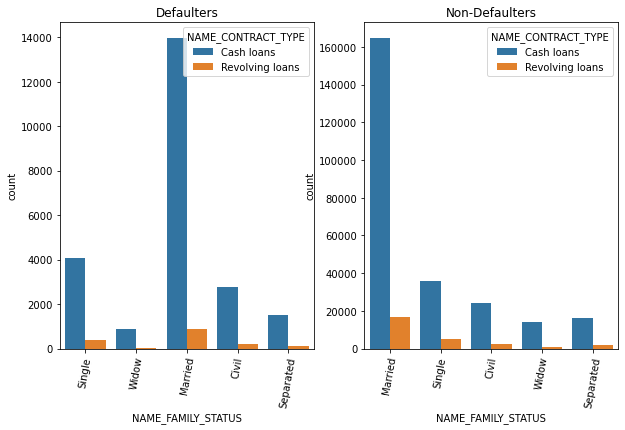

In [81]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_TYPE',data=appdata_1)
plt.xticks(rotation=80)

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.countplot(x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_TYPE',data=appdata_0)
plt.xticks(rotation=80)

### Analysing with the previous data


In [82]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [83]:
prevdata.shape

(1670214, 37)

In [84]:
prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [85]:
prevdata.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [86]:
prevdata.dropna(thresh=prevdata.shape[0]*0.6,how='all',axis=1,inplace=True)

In [87]:
prevdata.shape

(1670214, 26)

In [88]:
prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [89]:
prevdata.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

0.50    11250.0000
0.70    17783.1270
0.90    34703.8200
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64

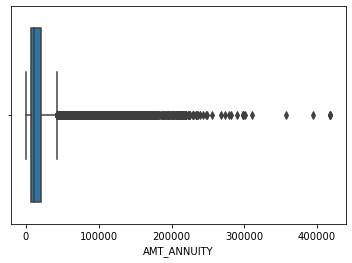

In [90]:
sns.boxplot( prevdata.AMT_ANNUITY)
prevdata.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99])

In [91]:
finaldata=appdata.reset_index(drop=True).merge(prevdata.reset_index(drop=True), left_index=True, right_index=True)
finaldata.head()

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,SK_ID_PREV,SK_ID_CURR_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary,Single,9461,637,3648,2120,1,1,0,1,Laborers,1,Business Entity Type 3,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher,Married,16765,1188,1186,291,1,1,0,1,Core staff,2,School,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary,Single,19046,225,4260,2531,1,1,1,1,Laborers,1,Government,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary,Civil,19005,3039,9833,2437,1,1,0,1,Laborers,2,Business Entity Type 3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary,Single,19932,3038,4311,3458,1,1,0,1,Core staff,1,Religion,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [92]:
finaldata.isnull().sum()

SK_ID_CURR_x                       0
TARGET                             0
NAME_CONTRACT_TYPE_x               0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT_x                       0
AMT_ANNUITY_x                      0
AMT_GOODS_PRICE_x                  0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    0
ORGANIZATION_TYPE                  0
SK_ID_PREV                         0
S

In [93]:
finaldata['NAME_CASH_LOAN_PURPOSE']=finaldata[~(finaldata.NAME_CASH_LOAN_PURPOSE=='XNA')]
finaldata['NAME_CLIENT_TYPE']=finaldata[~(finaldata.NAME_CLIENT_TYPE=='XNA')]

In [94]:
finaldata['CODE_REJECT_REASON']=finaldata[~(finaldata.CODE_REJECT_REASON=='XAP')]
finaldata['CODE_REJECT_REASON']=finaldata[~(finaldata.CODE_REJECT_REASON=='XNA')]

In [95]:
finaldata['NAME_SELLER_INDUSTRY']=finaldata[~(finaldata.NAME_SELLER_INDUSTRY=='XNA')]


In [96]:
finaldata['NAME_PAYMENT_TYPE']=finaldata[~(finaldata.NAME_PAYMENT_TYPE=='XNA')]
finaldata['NAME_PAYMENT_TYPE']=finaldata[~(finaldata.NAME_PAYMENT_TYPE=='XNA')]
finaldata.head()

,SK_ID_CURR_x,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,SK_ID_PREV,SK_ID_CURR_y,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700,351000,Unaccompanied,Working,Secondary,Single,9461,637,3648,2120,1,1,0,1,Laborers,1,Business Entity Type 3,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,100002,Approved,-73,100002,100002,100002,Mobile,POS,XNA,Country-wide,35,100002,12.0,middle,POS mobile with interest
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698,1129500,Family,State servant,Higher,Married,16765,1188,1186,291,1,1,0,1,Core staff,2,School,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,NaN,Approved,-164,100003,100003,100003,XNA,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750,135000,Unaccompanied,Working,Secondary,Single,19046,225,4260,2531,1,1,1,1,Laborers,1,Government,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,NaN,Approved,-301,100004,100004,100004,XNA,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686,297000,Unaccompanied,Working,Secondary,Civil,19005,3039,9833,2437,1,1,0,1,Laborers,2,Business Entity Type 3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,NaN,Approved,-512,100006,100006,100006,XNA,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865,513000,Unaccompanied,Working,Secondary,Single,19932,3038,4311,3458,1,1,0,1,Core staff,1,Religion,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,100007,Refused,-781,100007,100007,100007,XNA,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high


#### Univariate Analysis on final data

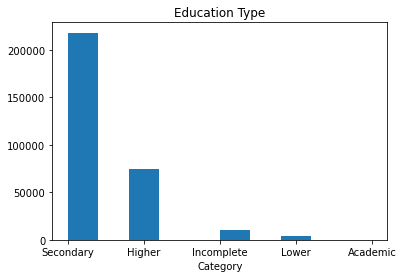

In [101]:
plt.hist(finaldata.NAME_EDUCATION_TYPE)
plt.title('Education Type')
plt.xlabel('Category')
plt.show()

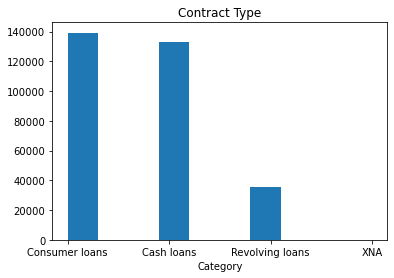

In [98]:
plt.hist(finaldata.NAME_CONTRACT_TYPE_y)
plt.title('Contract Type')
plt.xlabel('Category')
plt.show()

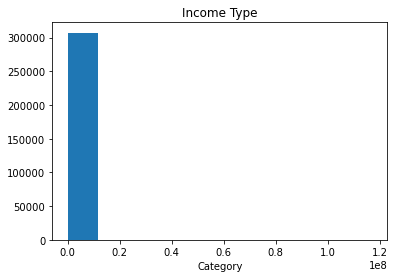

In [103]:
plt.hist(finaldata.AMT_INCOME_TOTAL)
plt.title('Income Type')
plt.xlabel('Category')
plt.show()